<a href="https://colab.research.google.com/github/SVaishnaviVasa/IIITH-AIML-Vaishnavi/blob/main/Copy_of_Basics_of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basics of Linear Algebra

Import the NumPy library for Linear Algebra functions and Matplotlib for some plotting functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Transpose of Matrix

Matrix transpose is performed with the transpose method on a nested list or a Python array, or a higher-dimensional Numpy array.

In [2]:
 # Transpose of a Matrix (as nested list)
 a = [[1,2,3,4],[2,3,4,5]]
 b = np.transpose(a)
 print('a\n',a)
 print('b\n',b)

a
 [[1, 2, 3, 4], [2, 3, 4, 5]]
b
 [[1 2]
 [2 3]
 [3 4]
 [4 5]]


If the matrix is a NumPy array, it can be treated as an object and method T can be applied over it as follows.

In [3]:
  # Transpose of a Matrix (as NumPy array)
print ("Matrix and its Transpose")
a = np.array([[1,2,3,4],[2,3,4,5]])
b = a.T
print('a\n',a)
print('b\n',b)

Matrix and its Transpose
a
 [[1 2 3 4]
 [2 3 4 5]]
b
 [[1 2]
 [2 3]
 [3 4]
 [4 5]]


The dot method of NumPy performs dot-matrix product (scalar product) for 1D or higher dimensional arrays. If the inputs are scalars (numbers), it performs multiplication.

In [4]:
 # scalars
 a = 5
 b = 3
 z = np.dot(a,b)
 print(z)

15


In [5]:
 z = a * b
 print(z)

15


In the case of one- or higher-dimensional arrays, the inputs can be either NumPy arrays, Python arrays, Python lists or Python’s nested lists.

In [6]:
 # 1D arrays or vectors
 a = np.array([1,2,3])  # or a = [1,2,3]
 b = np.array([2,3,4])  # or b = [2,3,4]
 z = np.dot(a,b)
 print(z)


20


In [7]:
 # 2D arrays or matrices
 a = [[1,2,3],[2,0,3],[7,-5,1]]
 b = [[3,-1,5],[-2,-6,4], [0,4,4]]
 z = np.dot(a,b)
 print(z)


[[-1 -1 25]
 [ 6 10 22]
 [31 27 19]]


We can obtained the same result using `np.matmul()`.

In [8]:
z = np.matmul(a,b)
print(z)

[[-1 -1 25]
 [ 6 10 22]
 [31 27 19]]


### Numpy Arrays
A NumPy array is a Numpy object upon which the dot method can be performed as below. However, this method accepts only NumPy arrays to operate on.


In [9]:
 # convert lists into NumPy arrays
 newa = np.array(a)
 newb = np.array(b)
 z = newa.dot(newb)
 print(z)

[[-1 -1 25]
 [ 6 10 22]
 [31 27 19]]


### The multi_dot method

It performs dot (scalar) product with 2 or more input matrices. First and last arrays can be either 1D or 2D arrays. However, the dimensions of the matrices must suit subsequent scalar matrix multiplication.

In [10]:
 # matrices with random integers: entries ranging from -4 to 4
 a = np.random.randint(-4,4,(500,5))
 b = np.random.randint(-4,4,(5,1000))
 c = np.random.randint(-4,4,(1000,10))
 d = np.random.randint(-4,4,(10,2000))
 e = np.random.randint(-4,4,(2000,200))
 # Perform multiple matrix multiplication
 z = np.linalg.multi_dot([a,b,c,d,e])

The result of this method can be obtained with successive dot products of matrices but multi_dot functions in an optimized manner. It decides the order of dot multiplication to complete the entire process efficiently.

In [11]:
 %%time
 z = np.linalg.multi_dot([a,b,c,d,e])
 print(z, '\n')

[[ -4449045  -4886552  -8040063 ...  -6509056  -5643025  -5467368]
 [ -6236565  -6758446 -11350233 ...  -8970468  -7765835  -8104366]
 [  2006188   2063204   3229955 ...   3020853   2952055   2329842]
 ...
 [-12166059 -13698252 -24035580 ... -16317031 -13384216 -15773199]
 [  8024684   9163596  15994290 ...  10896672   8839995  10497487]
 [ -6624501  -6798040 -11596524 ...  -8968761  -8078765  -7582447]] 

CPU times: user 8.92 ms, sys: 0 ns, total: 8.92 ms
Wall time: 11.9 ms


In [12]:
 %%time
 z = a.dot(b).dot(c).dot(d).dot(e)
 print(z, '\n')


[[ -4449045  -4886552  -8040063 ...  -6509056  -5643025  -5467368]
 [ -6236565  -6758446 -11350233 ...  -8970468  -7765835  -8104366]
 [  2006188   2063204   3229955 ...   3020853   2952055   2329842]
 ...
 [-12166059 -13698252 -24035580 ... -16317031 -13384216 -15773199]
 [  8024684   9163596  15994290 ...  10896672   8839995  10497487]
 [ -6624501  -6798040 -11596524 ...  -8968761  -8078765  -7582447]] 

CPU times: user 258 ms, sys: 3.63 ms, total: 261 ms
Wall time: 263 ms


#### Observe the CPU time that multi_dot consumes as against CPU time that successive dot methods consume to arrive at the same solution. Which one is more efficient, why ?

Ans. The efficiency of using `multi_dot` versus successive `dot` methods depends on the specific use case and the size of the matrices involved. The difference between the two approaches and when one might be more efficient than the other is given below:

1. **Successive `dot` Methods**:
   - When you perform matrix multiplication using successive `dot` methods, you multiply matrices one at a time. For example, if you have matrices A, B, and C, and you want to compute A * B * C, you would calculate (A * B) first and then multiply the result by C.
   - The advantage of this approach is that it allows for better memory management, especially when dealing with large matrices. You can perform the multiplications step by step without storing intermediate results in memory.

2. **`multi_dot` Function**:
   - `multi_dot` is designed to efficiently compute the product of multiple matrices in a single step. It optimizes the multiplication order to reduce the number of matrix multiplications performed.
   - This function is particularly useful when you need to multiply a large number of matrices together (e.g., A * B * C * D * ... * Z) because it minimizes the number of intermediate results and matrix multiplications, potentially improving computational efficiency.

**Which One Is More Efficient and Why**:

- For small numbers of matrices or small matrix sizes, the difference in efficiency between successive `dot` methods and `multi_dot` may not be significant, and the choice may come down to personal preference or code readability.

- For a large number of matrices or large matrix sizes, `multi_dot` is typically more efficient. This is because it optimizes the order of multiplication to minimize the number of actual multiplications, reducing computational overhead. Additionally, it can save memory by avoiding the need to store intermediate results.

In summary, the efficiency of `multi_dot` versus successive `dot` methods depends on the problem size and the number of matrices involved. For large and complex matrix multiplications, `multi_dot` is generally more efficient due to its optimization, reduced memory usage, and potentially fewer operations. However, for small and simple cases, the difference in efficiency may not be significant, and the choice can be based on code readability and simplicity.

### Inner Product

The inner product is the scalar multiplication of one vector (or matrix) and the transpose of another vector (or matrix). If both arrays are 1D arrays, their dimensions should be identical. If either or both arrays are higher-dimensional, then the last dimensions of both arrays should be identical.

In [13]:
 a = np.array([[1,2,3], [4,-1,0]])
 b = np.array([6,3,2])
 z = np.inner(a,b)
 print(z)

[18 21]


In [14]:

# The same results can be obtained using the dot method as follows.

a.dot(b.T)

array([18, 21])

### Outer Product

Outer product is the dot product of a column vector of size Mx1 and a row vector of size 1xN. The resulting array is a matrix of size MxN.


In [15]:
 a = np.array([1,2,3,4,5])
 b = np.array([6,3,2])
 z = np.outer(a,b)
 print(z)

[[ 6  3  2]
 [12  6  4]
 [18  9  6]
 [24 12  8]
 [30 15 10]]


The last dimension of the second array and the second-to-last dimension of the first array should be identical to perform matrix multiplication. Further, the symbol @ is also used to perform matrix multiplication.

In [16]:
 # Here, 'a' matrix is 3D, which means there are 3 matrices each of 2x5 size
 # Similarly, for 'b' matrix
 # So we perform 3 matrix multiplication operations each with 2x5 and 5x3 matrices from a and b
 a = np.random.random([3,2,5])
 b = np.random.random([3,5,3])
 z = a @ b
 print(z.shape)

(3, 2, 3)


### Matrix Determinant

Matrix determinant can be calculated using the method det available in the linalg module.

In [17]:
 # generate a random integer matrix of size 3 by 3
 a = np.random.randint(1,10,[3,3])
 det = np.linalg.det(a)
 print(int(det))

-240


### Matrix Inverse

Inverse of a square matrix can be derived using the inv method of the linalg module.


In [18]:
 a = np.random.randint(1,10,[3,3])
 inv = np.linalg.inv(a)
 print(a)
 print()
 print(inv)


[[8 1 5]
 [1 5 8]
 [7 7 1]]

[[ 0.10344828 -0.06896552  0.03448276]
 [-0.11156187  0.05476673  0.11967546]
 [ 0.05679513  0.09939148 -0.07910751]]


### Matrix Power

Matrix Power is a general method to obtain either positive or negative powers of a given square matrix. The first negative power of a matrix is technically termed its inverse. Thus, the matrix_power method can be used to find the inverse or any power of a matrix.

In [19]:
 a = np.random.random([4,4])
 # positive powers of matrix
 a_2 = np.linalg.matrix_power(a, 2)
 a_7 = np.linalg.matrix_power(a, 7)
 # inverse of matrix
 a_inv_1 = np.linalg.matrix_power(a, -1)
 a_inv_3 = np.linalg.matrix_power(a, -3)
 print('matrix \n', a)
 print('\n matrix to the power 2\n', a_2)
 print('\n matrix to the power 7\n', a_7)
 print('\n matrix inverse \n', a_inv_1)
 print('\n matrix cubic inverse \n', a_inv_3)

matrix 
 [[0.57484901 0.7987791  0.96888579 0.8094271 ]
 [0.40354376 0.9504811  0.59809127 0.7475086 ]
 [0.03266098 0.47069069 0.55683778 0.97925614]
 [0.26777902 0.9984577  0.77137034 0.47257244]]

 matrix to the power 2
 [[0.90118605 2.48262606 2.19858611 2.39369292]
 [0.83523881 2.25362835 1.86910804 1.97606856]
 [0.48913054 1.71331571 1.37859821 1.3863383 ]
 [0.70859257 1.99783188 1.65067263 1.94179716]]

 matrix to the power 7
 [[ 90.3362892  261.13601692 216.88564665 235.14925611]
 [ 78.89980264 228.07724636 189.4287971  205.38108279]
 [ 56.21687314 162.50598091 134.96934452 146.33638894]
 [ 71.581864   206.92335938 171.85965078 186.33059908]]

 matrix inverse 
 [[ 1.59973305  1.82119878 -1.6287788  -2.24566082]
 [-1.4336607   1.43849914 -0.37414782  0.95549351]
 [ 1.39786529 -3.12046846  0.43068067  1.64918688]
 [-0.15912314  1.02222942  1.01044671 -1.32215253]]

 matrix cubic inverse 
 [[-23.5794897   26.30087436  -4.18294878   4.13176409]
 [ -7.14113562 -12.20002707  11.456838

### Eigenvalues and Eigenvectors

Eigenvalues and Eigenvectors of a matrix can be determined as follows. If Eigen values cannot be determined, the method throws an error (Eg. Singular matrix).

In [20]:
 a = np.arange(9).reshape(3,3)
 eig_val, eig_vec = np.linalg.eig(a)
 print('Eigenvalues are: \n', eig_val)
 print('\nEigenvectors are: \n', eig_vec)


Eigenvalues are: 
 [ 1.33484692e+01 -1.34846923e+00 -2.48477279e-16]

Eigenvectors are: 
 [[ 0.16476382  0.79969966  0.40824829]
 [ 0.50577448  0.10420579 -0.81649658]
 [ 0.84678513 -0.59128809  0.40824829]]


In [21]:
# Eigenvalues alone can be determined using the method eigvals as shown below.

a = np.arange(9).reshape(3,3)
eigenvalues = np.linalg.eigvals(a)
print(eigenvalues)

[ 1.33484692e+01 -1.34846923e+00 -2.48477279e-16]


### Traces of a Matrix

Traces of a square matrix is the summation of its diagonal elements.

In [22]:
a = np.eye(5)
print(a)
z = np.trace(a)
print('\nTrace of matrix is: ',z)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Trace of matrix is:  5.0


### Matrix Norm

Matrix or vector norm is calculated using the norm method of the linalg module.


In [23]:
a = np.arange(12).reshape(4,3)
z = np.linalg.norm(a)
print(a)
print('\n Frobenius Norm of above matrix:')
print(z)


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

 Frobenius Norm of above matrix:
22.494443758403985


#### Norm of Matrix

Axis-wise norm determination is also possible by specifying the axis as an integer.


In [24]:
# Norm along axis 0
a = np.arange(12).reshape(4,3)
z = np.linalg.norm(a, axis=0)
print(z)

[11.22497216 12.88409873 14.62873884]


### Solving System of Equations

When we think of Linear Algebra, the system of linear equations comes to our mind first, as it is tedious, time-consuming and error-prone. NumPy solves systems of linear equations in a fraction of seconds!

In [25]:
# Coefficient Matrix
a = np.random.randint(1,20,[4,4])
# Dependent variable vector
b = np.array([4,9,12,7])
# solution
x = np.linalg.solve(a,b)
print('Coefficient Matrix')
print(a)
print('\nDependent Variable vector')
print(b)
print('\nSolution')
print(x)

Coefficient Matrix
[[18  7 10  1]
 [11 18 18  8]
 [ 2 18 19 18]
 [ 6 18 13  2]]

Dependent Variable vector
[ 4  9 12  7]

Solution
[ 0.23329356  0.61426014 -0.50596659  0.56056086]


In [26]:
# Check for correctness
B = a.dot(x)
print(B)

# This ‘B’ array is identical to the input ‘b’ array. Hence, our solution is correct.

[ 4.  9. 12.  7.]


### Singular Value Decomposition

Singular Value Decomposition (SVD) is one of the great dimension-reduction algorithms in machine learning. It identifies the principal components and arranges them by rank. The top ranked components contribute greatly to the original array. Here, we explore SVD with an image to get better understanding.

uint8 0 255 (512, 512, 3)


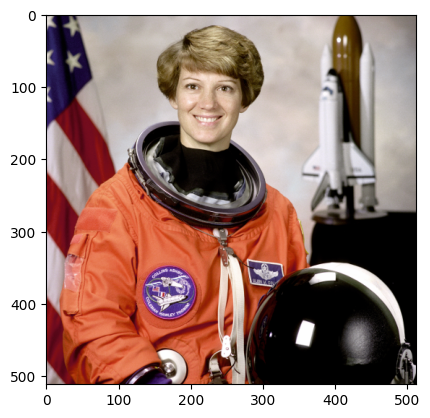

In [27]:
from skimage import data
# download a sample image
image = data.astronaut()
print(image.dtype, image.min(), image.max(), image.shape)
plt.imshow(image)
plt.show()

In [28]:
# Normalize the image by dividing it by the maximum value, 255 and reorder the axes to be (3,400,600).

# normalize image
img = image/255.0
# reorder the axes to have colour channels as the first dimension
img = np.transpose(img, axes=(2,0,1))

Perform SVD on the image. It decomposes the original image into three components: U matrix, Sigma vector, and V matrix. The Sigma vector is the diagonal entries of the Sigma matrix. Hence, it is advisable that the Sigma vector may be reformed into a diagonal matrix. It should be noted that the first dimension 3 refers to the three colour channels.

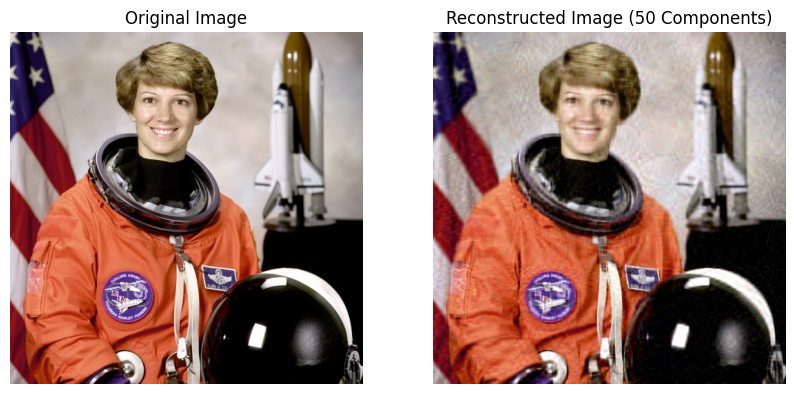

In [31]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

# Load the sample image (astronaut image)
image = data.astronaut()

# Perform SVD on each color channel separately
U_red, Sigma_red, Vt_red = np.linalg.svd(image[:, :, 0], full_matrices=False)
U_green, Sigma_green, Vt_green = np.linalg.svd(image[:, :, 1], full_matrices=False)
U_blue, Sigma_blue, Vt_blue = np.linalg.svd(image[:, :, 2], full_matrices=False)

# Reconstruct the diagonal matrices for each color channel
num_components = 50  # You can adjust this number as needed
Sigma_red_reconstructed = np.diag(Sigma_red[:num_components])
Sigma_green_reconstructed = np.diag(Sigma_green[:num_components])
Sigma_blue_reconstructed = np.diag(Sigma_blue[:num_components])

# Reconstruct each color channel separately
reconstructed_red = np.dot(U_red[:, :num_components], np.dot(Sigma_red_reconstructed, Vt_red[:num_components, :]))
reconstructed_green = np.dot(U_green[:, :num_components], np.dot(Sigma_green_reconstructed, Vt_green[:num_components, :]))
reconstructed_blue = np.dot(U_blue[:, :num_components], np.dot(Sigma_blue_reconstructed, Vt_blue[:num_components, :]))

# Combine the reconstructed color channels to form the final image
reconstructed_image = np.stack((reconstructed_red, reconstructed_green, reconstructed_blue), axis=-1)

# Clip the reconstructed image to the valid range [0, 255]
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image ({} Components)".format(num_components))
plt.imshow(reconstructed_image)
plt.axis("off")

plt.show()


In [32]:
U,S,V = np.linalg.svd(img)
print(U.shape, S.shape, V.shape)


(3, 512, 512) (3, 512) (3, 512, 512)


In [33]:
# S matrix should have dimensions suitable for matrix multiplication
Sigma = np.zeros((3,512,512))
for i in range(3):
  np.fill_diagonal(Sigma[i,:,:], S[i,:])
print(Sigma.shape)

(3, 512, 512)


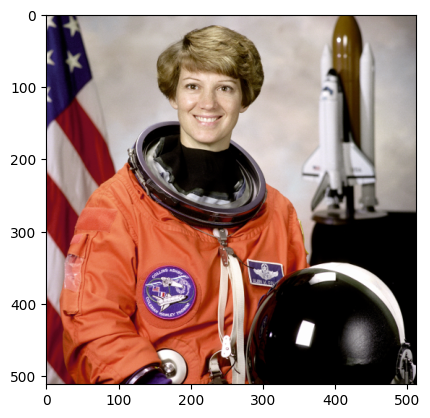

In [34]:
# Reconstruct the original image without any dimension reduction.
reconst = U @ Sigma @ V
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()


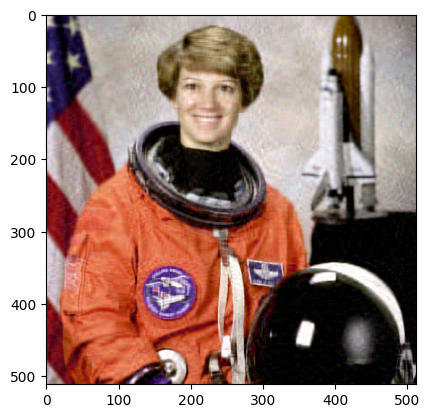

In [35]:
# NumPy SVD reconstruction

# Reconstruct the data by reducing the common dimensions from 512 to 50.

k = 50
reconst = U @ Sigma[:,:,:k] @ V[:,:k,:]
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()

#### Dimensionality reduction

It is amazing that we reconstructed the image with most details, even at a reduction of ¼.

We can once again reconstruct the same image by reducing the data points from 512 to 20.


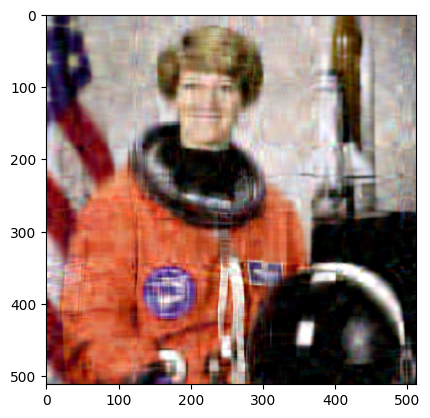

In [36]:
k = 20
reconst = U @ Sigma[:,:,:k] @ V[:,:k,:]
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()

#### SVD reconstruction

Out of 400 data points, merely 20 data points can reconstruct the image with key feature details! This is why the old mathematical algorithm- SVD is still popular in machine learning.

### Additional References

[Numpy Matrix Multiplication Terminology](https://likegeeks.com/numpy-matrix-multiplication/#Basic_Terminologies)

# **HOMEWORK QUESTIONS**



**Q1. How many times of categorical encodings are there?**

**Ans.**Categorical encodings are techniques used in data preprocessing to convert categorical (non-numeric) data into a numerical format so that machine learning algorithms can work with them. There are several common categorical encoding methods, including:

1. **Label Encoding**:
   - In label encoding, each category is assigned a unique integer label.
   - Example: If you have categories "Red," "Green," and "Blue," they might be encoded as 0, 1, and 2, respectively.

2. **One-Hot Encoding**:
   - In one-hot encoding, each category is converted into a binary vector where each category corresponds to a unique column, and a 1 is placed in the column corresponding to the category, while all other columns contain 0s.
   - Example: If you have categories "Cat," "Dog," and "Fish," one-hot encoding might represent "Cat" as [1, 0, 0], "Dog" as [0, 1, 0], and "Fish" as [0, 0, 1].

3. **Binary Encoding**:
   - Binary encoding combines the benefits of label encoding and one-hot encoding. It converts categories into binary code and represents them in separate columns.
   - Example: "Red" might be encoded as 001, "Green" as 010, and "Blue" as 100.

4. **Count Encoding**:
   - In count encoding, each category is replaced with the count (frequency) of that category in the dataset.
   - Example: If "Red" appears 20 times in the dataset, all instances of "Red" are encoded as 20.

5. **Frequency Encoding**:
   - Similar to count encoding, but instead of using counts, it uses the frequency or proportion of each category in the dataset.
   - Example: If "Red" appears in 20% of the dataset, all instances of "Red" are encoded as 0.20.

6. **Target Encoding (Mean Encoding)**:
   - In target encoding, each category is replaced with the mean of the target variable for that category.
   - Example: If you're predicting house prices, and "Neighborhood A" has an average price of $200,000, all instances of "Neighborhood A" are encoded as $200,000.

7. **Ordinal Encoding**:
   - Ordinal encoding is used when the categorical variable has a meaningful order or hierarchy. Categories are assigned integers according to their order.
   - Example: Education levels - "High School" might be encoded as 1, "Bachelor's" as 2, and "Master's" as 3.

8. **Hash Encoding**:
   - Hash encoding converts categories into a fixed number of numerical values using a hash function. It can be useful when there are too many unique categories.
   - Example: Hashing "Category_A" might produce a numerical value like 0.1234.

These are some of the common categorical encoding methods, and the choice of encoding depends on the specific dataset, the nature of the categorical variables, and the machine learning algorithm being used.

In [ ]:
###################################################################################################################################

**Q2.Directions, Angles, Cosine similarity between two vectors.**

**Ans.**Certainly, let's discuss directions, angles, and cosine similarity between two vectors:

1. **Directions**:
   In mathematics, the direction of a vector refers to the orientation or path that the vector points in space. It is described by an angle measured relative to a reference axis, typically the positive x-axis in a two-dimensional Cartesian coordinate system or a coordinate axis in higher dimensions. The direction of a vector can be specified using various notations, including polar coordinates (angle and magnitude) or unit vectors (i, j, k in three dimensions). Directions are essential when dealing with physical quantities like velocity, force, or displacement.

2. **Angles Between Vectors**:
   When you have two vectors in a vector space, you can calculate the angle between them. This angle can provide information about how similar or dissimilar the vectors are in terms of their orientation. The angle θ between two vectors A and B can be calculated using the dot product (also known as the scalar product) as follows:
   
   Cos(θ) = (A · B) / (|A| * |B|)
   
   Where:
   - A · B is the dot product of vectors A and B.
   - |A| and |B| are the magnitudes (lengths) of vectors A and B, respectively.
   - Cos(θ) is the cosine of the angle θ between the vectors.

   You can then find θ by taking the arccosine (inverse cosine) of Cos(θ).

3. **Cosine Similarity Between Vectors**:
   Cosine similarity is a metric used to measure the similarity between two vectors in a vector space. It quantifies the cosine of the angle between the vectors. Higher cosine similarity values indicate greater similarity, while smaller values indicate dissimilarity.

   The cosine similarity between two vectors A and B is calculated using the dot product as follows:

   Cosine Similarity(A, B) = (A · B) / (|A| * |B|)

   Cosine similarity is commonly used in various applications such as information retrieval, natural language processing (for text similarity), and recommendation systems. It's a way to determine how parallel or aligned two vectors are in high-dimensional space.

In summary,
* directions refer to the orientation of a vector in space
* the angle between vectors is calculated using the dot product
* cosine similarity measures how similar two vectors are based on their orientation in a vector space.


In [37]:
#############################################################################################################################################

**Q3.Relation between Inner product and Dot Product**

**Ans.** :The terms "inner product" and "dot product" are closely related concepts in linear algebra, and they are often used interchangeably, but there are subtle differences in their definitions and contexts:

1. **Inner Product**:
   - An inner product is a more general concept defined on a vector space that satisfies certain properties. It is a function that takes two vectors from a vector space and returns a scalar.
   - In an inner product space, the inner product operation is denoted as ⟨v, w⟩ or (v, w), and it satisfies the following properties:
     a. Linearity in the first argument: ⟨av + bw, z⟩ = a⟨v, z⟩ + b⟨w, z⟩ for all vectors v, w, and z, and scalars a and b.
     b. Conjugate symmetry (Hermitian symmetry): ⟨v, w⟩ = ⟨w, v⟩* for all vectors v and w, where * represents complex conjugation (it's just conjugate symmetry in real vector spaces).
     c. Positive-definiteness: ⟨v, v⟩ ≥ 0 for all vectors v, and ⟨v, v⟩ = 0 if and only if v is the zero vector.

2. **Dot Product**:
   - The dot product is a specific type of inner product defined on Euclidean vector spaces (usually R^n, the vector space of n-dimensional real numbers) or complex vector spaces (C^n, the vector space of n-dimensional complex numbers).
   - In Euclidean spaces, the dot product of two vectors v and w is denoted as v · w and is defined as the sum of the products of their corresponding components:
     v · w = v₁w₁ + v₂w₂ + ... + v_nw_n (for vectors in R^n)
   - The dot product satisfies many of the properties of inner products, including linearity and positive-definiteness.

In summary, the dot product is a specific example of an inner product, but not all inner products are dot products. Dot products are commonly used in Euclidean spaces, while inner products can be defined on a broader class of vector spaces. When working in Euclidean spaces, the terms "dot product" and "inner product" are often used interchangeably because the dot product is the most common example of an inner product in this context.
